## Crypto Arbitrage

This notebook analyzes historical pricepoints for bitcoin in two exchanges to find any arbitrage opportunities

###  Modules and Dependencies

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

### Data Colection

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('../resources/bitstamp.csv'),  
    index_col="Timestamp",
    parse_dates=True, 
    infer_datetime_format=True
)

In [3]:
# View dataframe
bitstamp

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path('./Resources/coinbase.csv'),  
    index_col="Timestamp",
    parse_dates=True, 
    infer_datetime_format=True
)

In [5]:
# View the dataframe
coinbase

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747


## Prepare the Data

In [6]:
# Drop all NaNs or missing values
bitstamp = bitstamp.dropna()

In [7]:
# Use the str.replace function to remove the dollar sign, $
bitstamp['Close'] = bitstamp['Close'].str.replace('$', '')

/Users/avancamp/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/Users/avancamp/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
# Convert the Close data type to a float
bitstamp['Close'] = bitstamp['Close'].astype(float)

/Users/avancamp/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
# Review the data for duplicate values, and drop them if necessary
bitstamp = bitstamp.drop_duplicates()

In [10]:
# Repeat for coinbase dataframe
coinbase = coinbase.dropna()
coinbase['Close'] = coinbase['Close'].str.replace('$', '')
coinbase = coinbase.drop_duplicates()
coinbase['Close'] = coinbase['Close'].astype(float)
coinbase = coinbase.drop_duplicates()

/Users/avancamp/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/avancamp/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Analyze the Data

In [39]:
# Select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.iloc[:, [3]]

bitstamp_sliced

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00
...,...
2018-03-31 23:55:00,6922.56
2018-03-31 23:56:00,6920.32
2018-03-31 23:57:00,6934.72


In [40]:
# Select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.iloc[:, [3]]

coinbase_sliced

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44
...,...
2018-03-31 23:55:00,6930.00
2018-03-31 23:56:00,6930.01
2018-03-31 23:57:00,6933.91


In [13]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [14]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

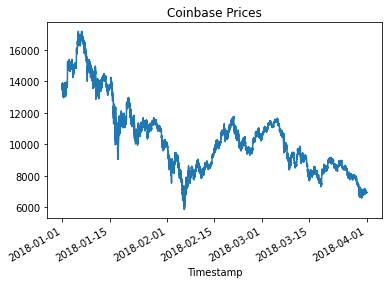

In [15]:
# Plot Coinbase prices
coinbase['Close'].plot(title='Coinbase Prices')

<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp'>

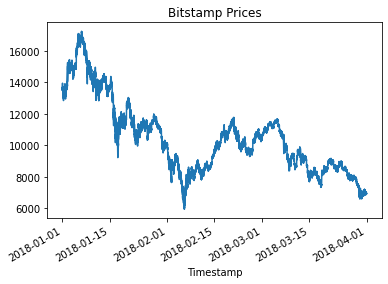

In [16]:
# Plot Bitstamp prices
bitstamp['Close'].plot(title='Bitstamp Prices')

<AxesSubplot:title={'center':'Bitstamp v. Coinbase'}, xlabel='Timestamp'>

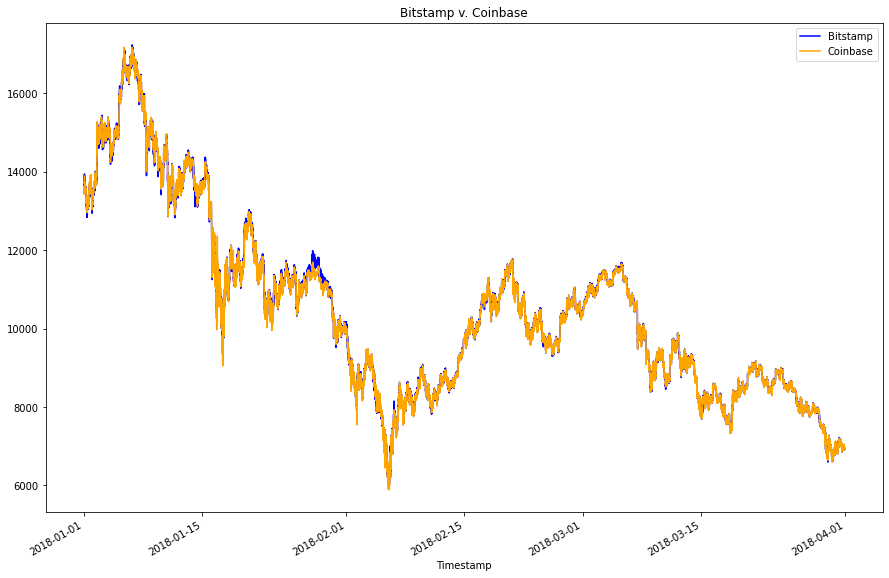

In [17]:
# Overlay the visualizations
bitstamp['Close'].plot(
    legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase", color="blue", label="Bitstamp")

coinbase['Close'].plot(
    legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase", color="orange", label="Coinbase")


<AxesSubplot:title={'center':'Exchange Comparison (Earlier Time Period)'}, xlabel='Timestamp'>

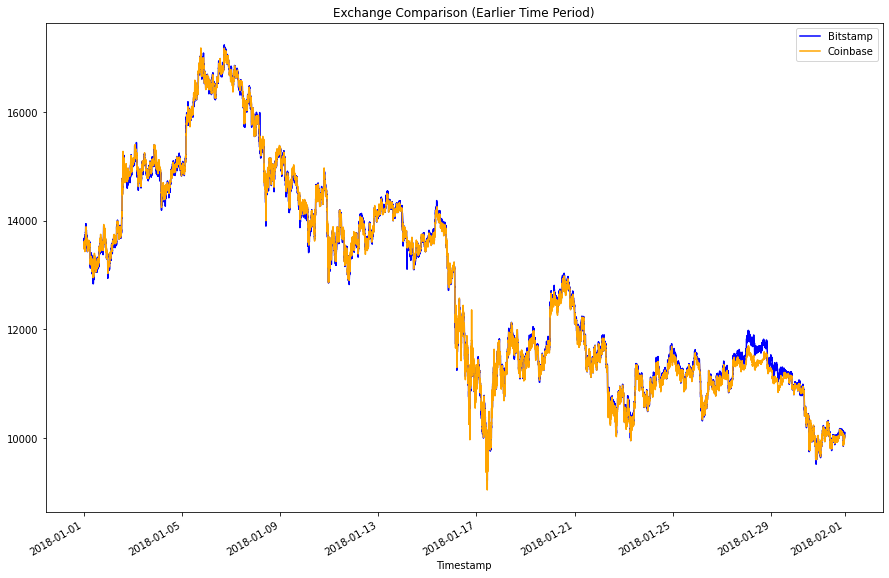

In [18]:
# Create plot for early month time period
bitstamp['Close'].loc['2018-01-01':'2018-01-31'].plot(
    legend=True, figsize=(15, 10), title="Exchange Comparison (Earlier Time Period)", color="blue", label="Bitstamp")

coinbase['Close'].loc['2018-01-01':'2018-01-31'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

<AxesSubplot:title={'center':'Exchange Comparison (Later Time Period)'}, xlabel='Timestamp'>

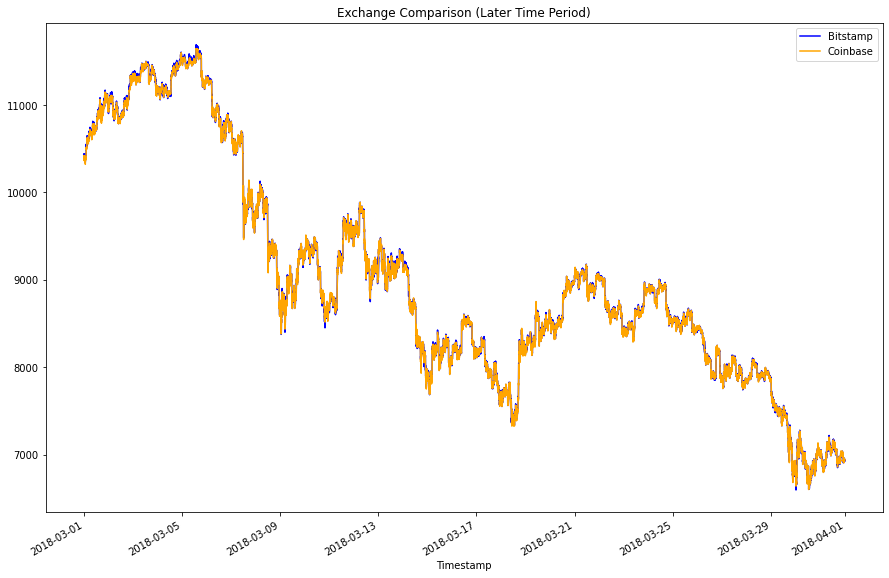

In [19]:
# Create plot for later month time period
bitstamp['Close'].loc['2018-03-01':'2018-03-31'].plot(
    legend=True, figsize=(15, 10), title="Exchange Comparison (Later Time Period)", color="blue", label="Bitstamp")

coinbase['Close'].loc['2018-03-01':'2018-03-31'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

<AxesSubplot:title={'center':'Jan 16, 2018'}, xlabel='Timestamp'>

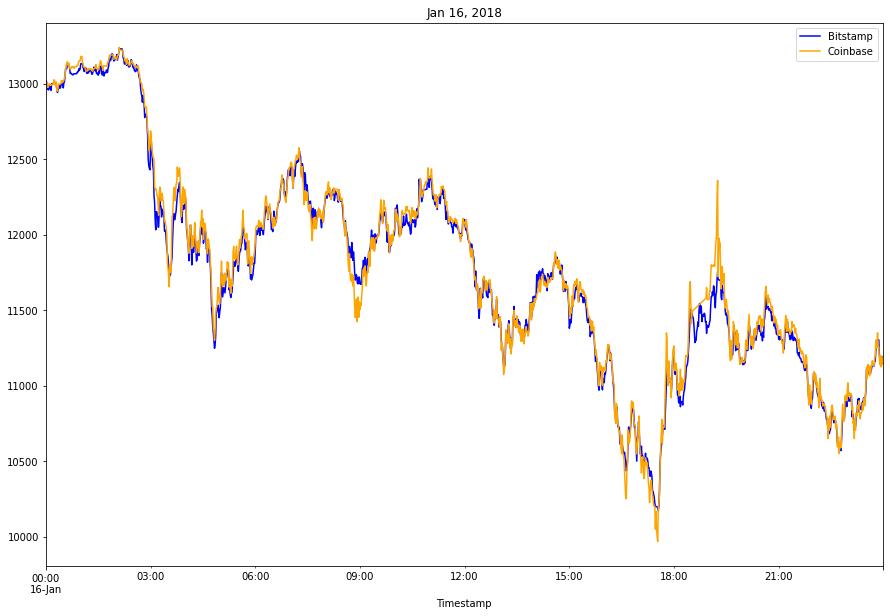

In [20]:
# Create plot for a day early in the period
bitstamp['Close'].loc['2018-01-16'].plot(
    legend=True, figsize=(15, 10), title="Jan 16, 2018", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-01-16'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [21]:
# Calculate the arbitrage spread
arbitrage_spread_early = coinbase['Close'].loc['2018-01-16'] - bitstamp['Close'].loc['2018-01-16']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1419.000000
mean       23.212135
std        67.789186
min      -275.920000
25%        -8.330000
50%        22.280000
75%        52.355000
max       606.800000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Early Date'}>

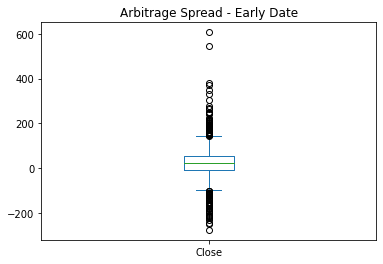

In [22]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box', title = "Arbitrage Spread - Early Date" )

<AxesSubplot:title={'center':'February 24th, 2018'}, xlabel='Timestamp'>

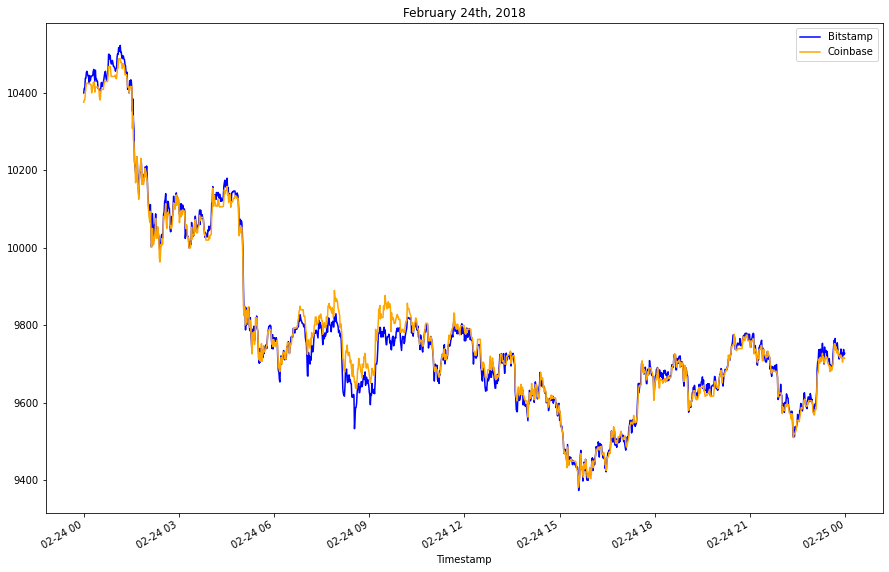

In [23]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
bitstamp['Close'].loc['2018-02-24'].plot(
    legend=True, figsize=(15, 10), title="February 24th, 2018", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-02-24'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [24]:
# Calculate the arbitrage spread 
arbitrage_spread_middle = coinbase['Close'].loc['2018-02-24'] - bitstamp['Close'].loc['2018-02-24']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1437.000000
mean        3.396131
std        22.969472
min       -50.180000
25%       -10.590000
50%        -0.010000
75%        12.120000
max       121.320000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Middle Date'}>

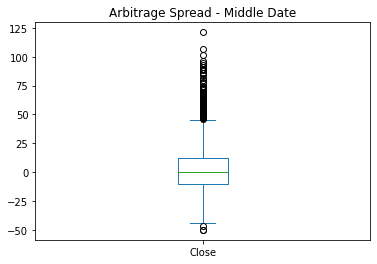

In [25]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box', title = "Arbitrage Spread - Middle Date")

<AxesSubplot:title={'center':'March 26th, 2018'}, xlabel='Timestamp'>

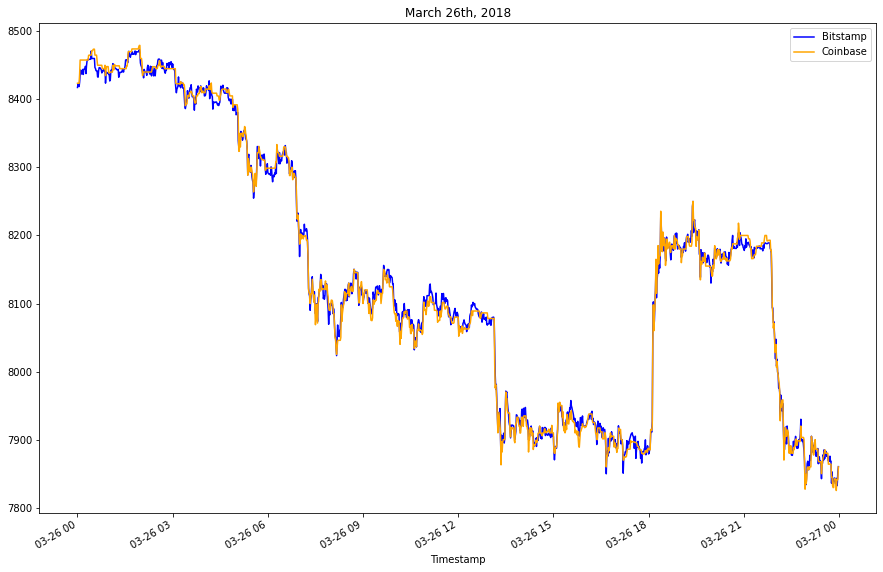

In [26]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
bitstamp['Close'].loc['2018-03-26'].plot(
    legend=True, figsize=(15, 10), title="March 26th, 2018", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-03-26'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [27]:
# Calculate the arbitrage spread
arbitrage_spread_late = coinbase['Close'].loc['2018-03-26'] - bitstamp['Close'].loc['2018-03-26']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1432.000000
mean       -0.722193
std         8.523060
min       -32.040000
25%        -6.812500
50%        -0.730000
75%         4.965000
max        35.070000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Late Date'}>

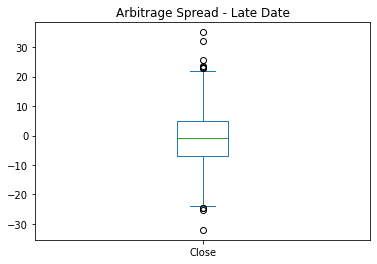

In [28]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box', title = "Arbitrage Spread - Late Date")

In [29]:
# Measure the arbitrage spread between the two exchanges
arbitrage_spread_early = coinbase['Close'].loc['2018-01-16'] - bitstamp['Close'].loc['2018-01-16']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early[arbitrage_spread_early > 0 ].describe()

count    960.000000
mean      53.405344
std       53.910409
min        0.010000
25%       21.602500
50%       39.885000
75%       68.547500
max      606.800000
Name: Close, dtype: float64

In [30]:
# Calculate the spread returns
spread_return_early= arbitrage_spread_early[arbitrage_spread_early > 0 ] / bitstamp['Close'].loc['2018-01-16']

# Review the spread return DataFrame
spread_return_early.head()

Timestamp
2018-01-16 00:00:00         NaN
2018-01-16 00:01:00         NaN
2018-01-16 00:02:00    0.000731
2018-01-16 00:03:00    0.001108
2018-01-16 00:04:00    0.000909
Name: Close, dtype: float64

In [31]:
# Determine the number of times trades with positive returns exceeded the 1% minimum threshold (.01) needed to cover costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-16 02:56:00    0.012962
2018-01-16 02:57:00    0.010838
2018-01-16 02:59:00    0.014171
2018-01-16 03:00:00    0.010675
2018-01-16 03:06:00    0.019704
Name: Close, dtype: float64

In [32]:
# Generate the summary statistics
profitable_trades_early.describe()

count    73.000000
mean      0.016720
std       0.007628
min       0.010109
25%       0.012061
50%       0.014794
75%       0.018124
max       0.051633
Name: Close, dtype: float64

In [33]:
# Calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp['Close'].loc['2018-01-16']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early

Timestamp
2018-01-16 02:56:00    162.01
2018-01-16 02:57:00    135.00
2018-01-16 02:59:00    176.13
2018-01-16 03:00:00    134.01
2018-01-16 03:06:00    241.54
                        ...  
2018-01-16 19:23:00    125.09
2018-01-16 19:26:00    131.78
2018-01-16 19:38:00    124.01
2018-01-16 19:48:00    117.63
2018-01-16 20:07:00    113.69
Name: Close, Length: 73, dtype: float64

In [34]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count     73.000000
mean     193.796849
std       88.701429
min      112.520000
25%      139.420000
50%      171.310000
75%      210.060000
max      606.800000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - Early Date'}, xlabel='Timestamp'>

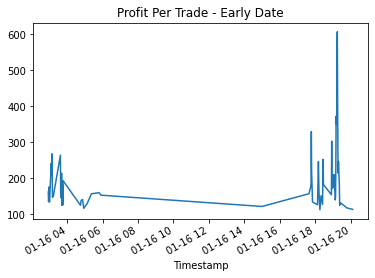

In [35]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(title = "Profit Per Trade - Early Date")

In [36]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early.sum()

14147.169999999998

In [37]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Cumulative Sum - Early Date'}, xlabel='Timestamp'>

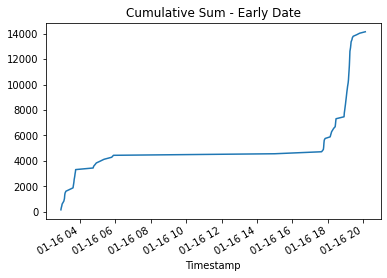

In [38]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(title = "Cumulative Sum - Early Date")